<a href="https://colab.research.google.com/github/Pranjul2121/Image_Recognition_ML/blob/main/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install -q kaggle #installing kaggle


In [8]:
from google.colab import files
files.upload()  #uploading the file to use key that we generate

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pranjultiwari21","key":"6713968dca66b39245f2c0b7f7ecd6d1"}'}

In [9]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle #making directory and opening the kaggle file which we have downloaded

In [10]:
! chmod 600 ~/.kaggle/kaggle.json  #setting some permission for kaggle

In [11]:
import kagglehub  #extract the whole dataset from kaggle dataset will be stored in it

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [12]:
import tensorflow as tf  #setting for check
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [13]:
x_train=x_train / 255.0  #check wether the datasets is in unified for or not eda technique and reshaping the data
x_test=x_test / 255.0
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(f"Train reshaped: {x_train.shape}")

Train reshaped: (60000, 28, 28, 1)


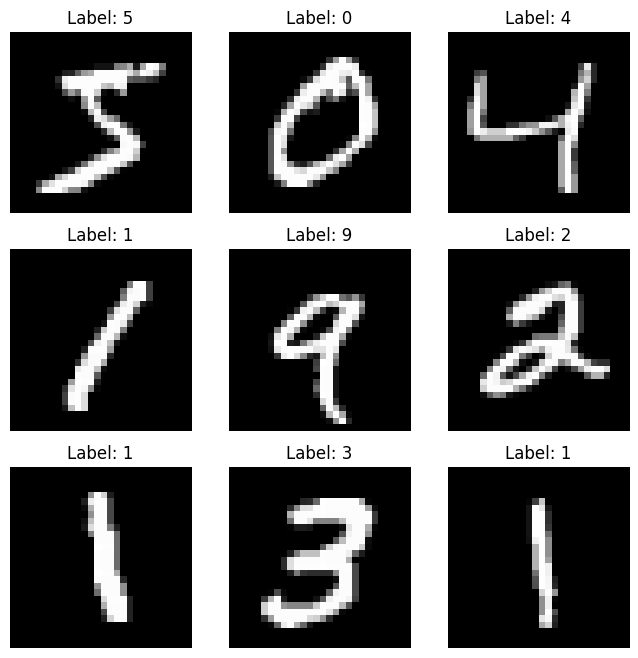

In [14]:
import matplotlib.pyplot as plt  #to visualize the data in form of various form
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

In [15]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR-10 train shape: (x_train_c10.shape)")
#train our data set with cifar-10 more visual used for coloured images recognition

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
CIFAR-10 train shape: (x_train_c10.shape)


In [16]:
from tensorflow.keras.models import Sequential #to make our first CNN model for image recognition
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8914 - loss: 0.3452 - val_accuracy: 0.9832 - val_loss: 0.0570
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9835 - loss: 0.0543 - val_accuracy: 0.9876 - val_loss: 0.0427
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9895 - loss: 0.0318 - val_accuracy: 0.9837 - val_loss: 0.0587
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9928 - loss: 0.0217 - val_accuracy: 0.9896 - val_loss: 0.0359
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9952 - loss: 0.0152 - val_accuracy: 0.9898 - val_loss: 0.0396


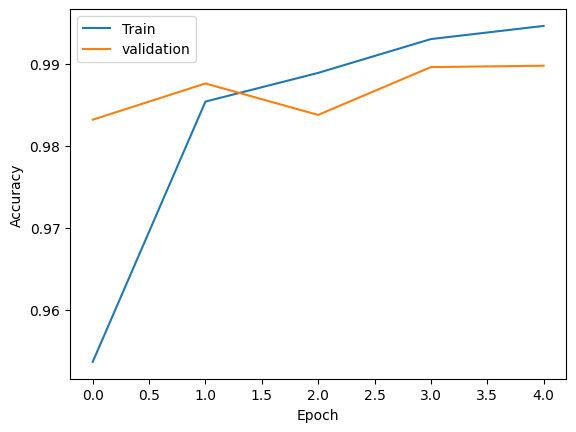

In [18]:
#plotting a graph how well it is doing just visualizing
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'],
         label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
#now test the model with the new data exam of it to test or check its accuracy
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test Accuracy:{test_acc:4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9899 - loss: 0.0345
Test Accuracy:0.991800
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [20]:
#Now we will prevent our dataset to be overfited using droupout

from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #we are making more images by rotating shifting and fliping them by this help the model become smarter and recognize the object in different angle

datagen=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(x_train_c10)

In [22]:
#so in this we are telling the model to how to recognize it from diff angle from diff pov
from tensorflow.keras.layers import BatchNormalization  #this import the special layer stabilized and speed up the whole traning model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #advance cnn that can look a color images also 32*32 pixels it can run step by step
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 79ms/step - accuracy: 0.3403 - loss: 1.7878 - val_accuracy: 0.5177 - val_loss: 1.3111
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.5240 - loss: 1.3308 - val_accuracy: 0.5631 - val_loss: 1.2147
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 78ms/step - accuracy: 0.5760 - loss: 1.2022 - val_accuracy: 0.6343 - val_loss: 1.0356
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.6041 - loss: 1.1288 - val_accuracy: 0.6234 - val_loss: 1.0830
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 78ms/step - accuracy: 0.6240 - loss: 1.0840 - val_accuracy: 0.6590 - val_loss: 0.9765
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 78ms/step - accuracy: 0.6433 - loss: 1.0325 - val_accuracy: 0.6749 - val_loss: 0.9276
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 78ms/step - accuracy: 0.6527 - loss: 1.0121 - val_accuracy: 0.5671 - val_loss: 1.2954
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.6633 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1000
           1       0.84      0.77      0.80      1000
           2       0.73      0.41      0.53      1000
           3       0.56      0.32      0.41      1000
           4       0.77      0.36      0.49      1000
           5       0.83      0.33      0.47      1000
           6       0.47      0.90      0.61      1000
           7       0.66      0.68      0.67      1000
           8       0.73      0.83      0.78      1000
           9       0.44      0.95      0.61      1000

    accuracy                           0.62     10000
   macro avg       0.68      0.62      0.61     10000
weighted avg       0.68      0.62      0.61     10000



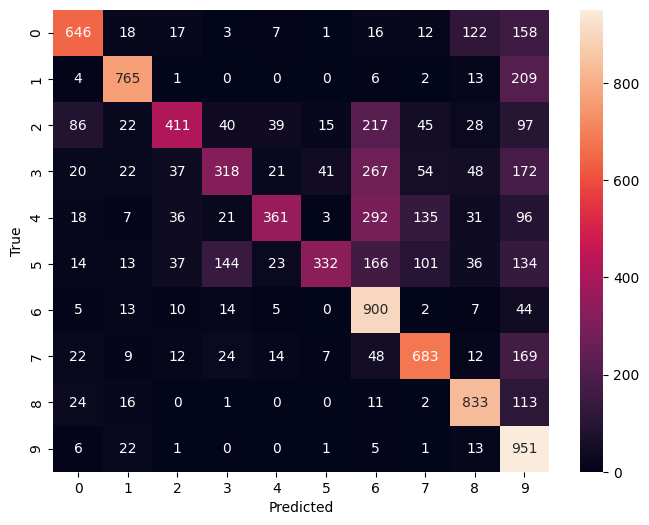

In [23]:
#importing tool to analyze the pridiction what we have made
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred_c10 = model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
# to find tune using pre trained model to classify its a dog or cat by just giving image
# telling kaggle to give datasets of cat and dog
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 99% 215M/218M [00:00<00:00, 326MB/s]
100% 218M/218M [00:00<00:00, 373MB/s]


In [25]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cat')

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # to go inside folder of cats and dogs and resize them 224 224
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory('/content/dogs-vs-cat',target_size=(224,224),batch_size=32,class_mode='binary',subset='training')
validation_generator=datagen.flow_from_directory('/content/dogs-vs-cat',target_size=(224,224),batch_size=32,class_mode='binary',subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [27]:
from tensorflow.keras.applications import MobileNetV2 #pre trained model for images
from tensorflow.keras.models import Sequential #cnn layer by layers building
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D #convert a feature map in a single value per feature channel

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=validation_generator) #we have borrowed a brain mobilev2 that know how to look at pic and froz it so it also dont forget and add our own dicision layerand trained only the new part wheater it is cat or the dog

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - accuracy: 0.7802 - loss: 0.5353 - val_accuracy: 0.7985 - val_loss: 0.5069
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.8018 - loss: 0.4937 - val_accuracy: 0.7985 - val_loss: 0.5123
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.8022 - loss: 0.4770 - val_accuracy: 0.7985 - val_loss: 0.5179
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 476s 2s/step - accuracy: 0.8019 - loss: 0.4697 - val_accuracy: 0.7965 - val_loss: 0.5201
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.8176 - loss: 0.4313 - val_accuracy: 0.7905 - val_loss: 0.5411


In [28]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=validation_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1806s 7s/step - accuracy: 0.7988 - loss: 0.4853 - val_accuracy: 0.7900 - val_loss: 0.5379
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1698s 7s/step - accuracy: 0.8050 - loss: 0.4399 - val_accuracy: 0.7865 - val_loss: 0.5387
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1705s 7s/step - accuracy: 0.8137 - loss: 0.4105 - val_accuracy: 0.7840 - val_loss: 0.5390


In [29]:
model.save('mobilenet_cat_dogs.h5')
#to load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cat_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step


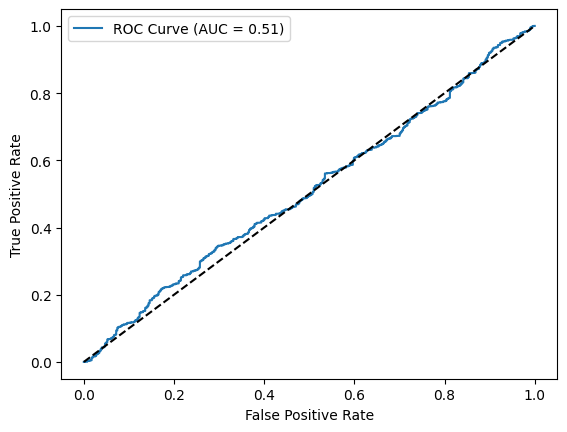

In [30]:
from sklearn.metrics import roc_curve,auc

y_pred_proba = loaded_model.predict(validation_generator) #predict the probability of each images in the validation set binary classification
fpr,tpr, _ = roc_curve(validation_generator.classes,y_pred_proba)
roc_auc=auc(fpr,tpr) #false posi rate or true
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--') #roc testing the model at every posivble decision how well dog seprate from cat
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [37]:
from google.colab import files
uploaded = files.upload() #upload mycat.jpg  #how to predict a new data

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
img_path='hdgrdyj.jpg'
img=image.load_img(img_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=preprocess_input(img_array)
prediction=loaded_model.predict(img_array)
print(f"Prediction: {'Dog' if prediction[0][0] > 0.5 else 'Cat'}")

Saving hdgrdyj.jpg to hdgrdyj (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: Dog


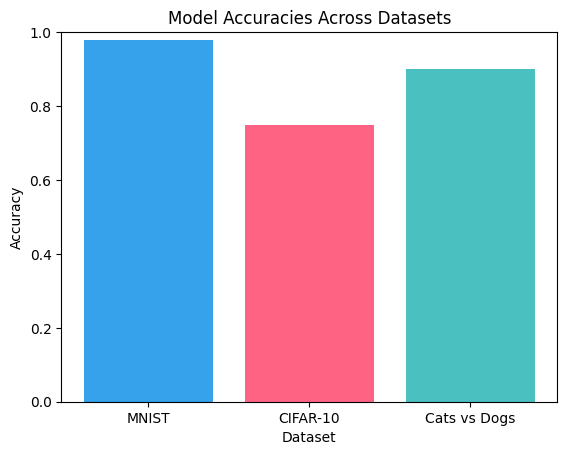

In [44]:
import matplotlib.pyplot as plt
datasets=['MNIST','CIFAR-10','Cats vs Dogs']
accuracies=[0.98,0.75,0.90]
plt.bar(datasets,accuracies,color=['#36A2EB','#FF6384','#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()